**Importing of Modules**

In [48]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [49]:
#loading up of data from the CIFAR10 dataset
#here we will be considering the X_train and y_train datasets for training purposes.
#Considering the X_test and y_test for testing purposes.
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()


In [50]:
#size of X_train and y_train
print(f'X_train datasets:\n${X_train.shape}')
#here first element defines the number of samples
#the size of the image is 32*32 and there are 3 color channels(R,G,B)

X_train datasets:
$(50000, 32, 32, 3)


In [51]:
#resizing of 2d array into 1d array
y_train=y_train.reshape(-1,)

In [52]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


**Displaying the Image from the above defined Dataset**

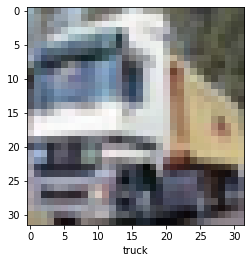

In [57]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,4))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])  

plot_sample(X_train,y_train,1)  
#it basically a truck image over here

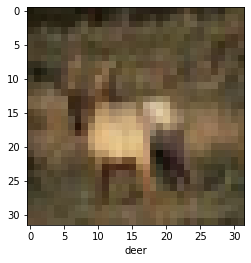

In [58]:
plot_sample(X_train,y_train,3) 

**Normalization of Values**

In [32]:
#normalization of X 
X_train=X_train/255
x_test=y_test/255

**Building of ANN(Artificial Neural Network) Model**

In [ ]:
ann=models.Sequential([
    #flattening of the given layers
    layers.Flatten(input_shape=(32,32,3)),
    #now we consider 2 different hidden layers
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
#compilation of given model
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=3)

Epoch 1/3
1563/1563 [==============================] - 166s 106ms/step - loss: 1.8067 - accuracy: 0.3571
Epoch 2/3
1563/1563 [==============================] - 137s 88ms/step - loss: 1.6221 - accuracy: 0.4275
Epoch 3/3
1416/1563 [==========================>...] - ETA: 11s - loss: 1.5385 - accuracy: 0.4576

**Model Evaluation**

In [18]:
#determines the accuracy of the given model
ann.evaluate(X_test,y_test)
# print(f'the accuracy of the model is {ann.evaluate(X_test,y_test)[1]*100}')

313/313 [==============================] - 10s 31ms/step - loss: 161.0105 - accuracy: 0.4527


[161.01046752929688, 0.4526999890804291]

**Classification Report for ANN model**

In [33]:
#performance of ann(aritificial Neural Network) is very less with an accuracy of 
#generation of classification report

from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report:\n",classification_report(y_test,y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.96      0.27      1000
           1       0.30      0.25      0.27      1000
           2       0.15      0.31      0.20      1000
           3       0.22      0.20      0.21      1000
           4       0.24      0.01      0.03      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.17     10000
   macro avg       0.11      0.17      0.10     10000
weighted avg       0.11      0.17      0.10     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


****

**Building of CNN(Artificial Neural Network) Model**

In [22]:
#softmax is basically utilized to normalize the probability
cnn=models.Sequential([
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    #another phase of convolution and pooling
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    #flattening of the given layers
    layers.Flatten(),
    #now we consider 2 different hidden layers
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

#compilation of the given model
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#fit the model
cnn.fit(X_train,y_train,epochs=12)

Epoch 1/12
1563/1563 [==============================] - 64s 40ms/step - loss: 1.5287 - accuracy: 0.4463
Epoch 2/12
1563/1563 [==============================] - 60s 38ms/step - loss: 1.2177 - accuracy: 0.5683
Epoch 3/12
1563/1563 [==============================] - 59s 37ms/step - loss: 1.0809 - accuracy: 0.6226
Epoch 4/12
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0058 - accuracy: 0.6500
Epoch 5/12
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9505 - accuracy: 0.6696
Epoch 6/12
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9066 - accuracy: 0.6838
Epoch 7/12
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8697 - accuracy: 0.6993
Epoch 8/12
1563/1563 [==============================] - 59s 37ms/step - loss: 0.8315 - accuracy: 0.7098
Epoch 9/12
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8023 - accuracy: 0.7231
Epoch 10/12
1563/1563 [==============================] - 58s 37m

**Classification Report for CNN model**

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=cnn.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report:\n",classification_report(y_test,y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.78      0.50      1000
           1       0.62      0.70      0.65      1000
           2       0.73      0.12      0.21      1000
           3       0.40      0.19      0.26      1000
           4       0.56      0.08      0.14      1000
           5       0.43      0.49      0.46      1000
           6       0.76      0.30      0.43      1000
           7       0.46      0.72      0.57      1000
           8       0.42      0.69      0.52      1000
           9       0.55      0.67      0.60      1000

    accuracy                           0.47     10000
   macro avg       0.53      0.47      0.43     10000
weighted avg       0.53      0.47      0.43     10000



In [59]:
#now from the above defined classification report of cnn and ann
#we basically get to know that cnn model is generating a higher level of accuracy as compared to ann model